In [1]:
import os
import sys
import pathlib

pwd = pathlib.Path().parent.absolute()
test_pdf = pwd / "test.pdf"

In [2]:
import requests


e2m_api = "http://127.0.0.1:8765/api/v1/convert"


def convert_pdf_to_md(pdf_file, langs=["en"], extract_images=False):
    with open(pdf_file, "rb") as file:
        files = {"file": file}
        params = {
            "parse_mode": "auto",
            "langs": ",".join(langs),
            "extract_images": extract_images,
        }

        response = requests.post(e2m_api, files=files, params=params)

        if response.status_code == 200:
            print("File converted successfully")
            return response.json()
        else:
            print(f"Failed to convert file: {response.status_code}")
            return None

In [3]:
# !pip install fitz

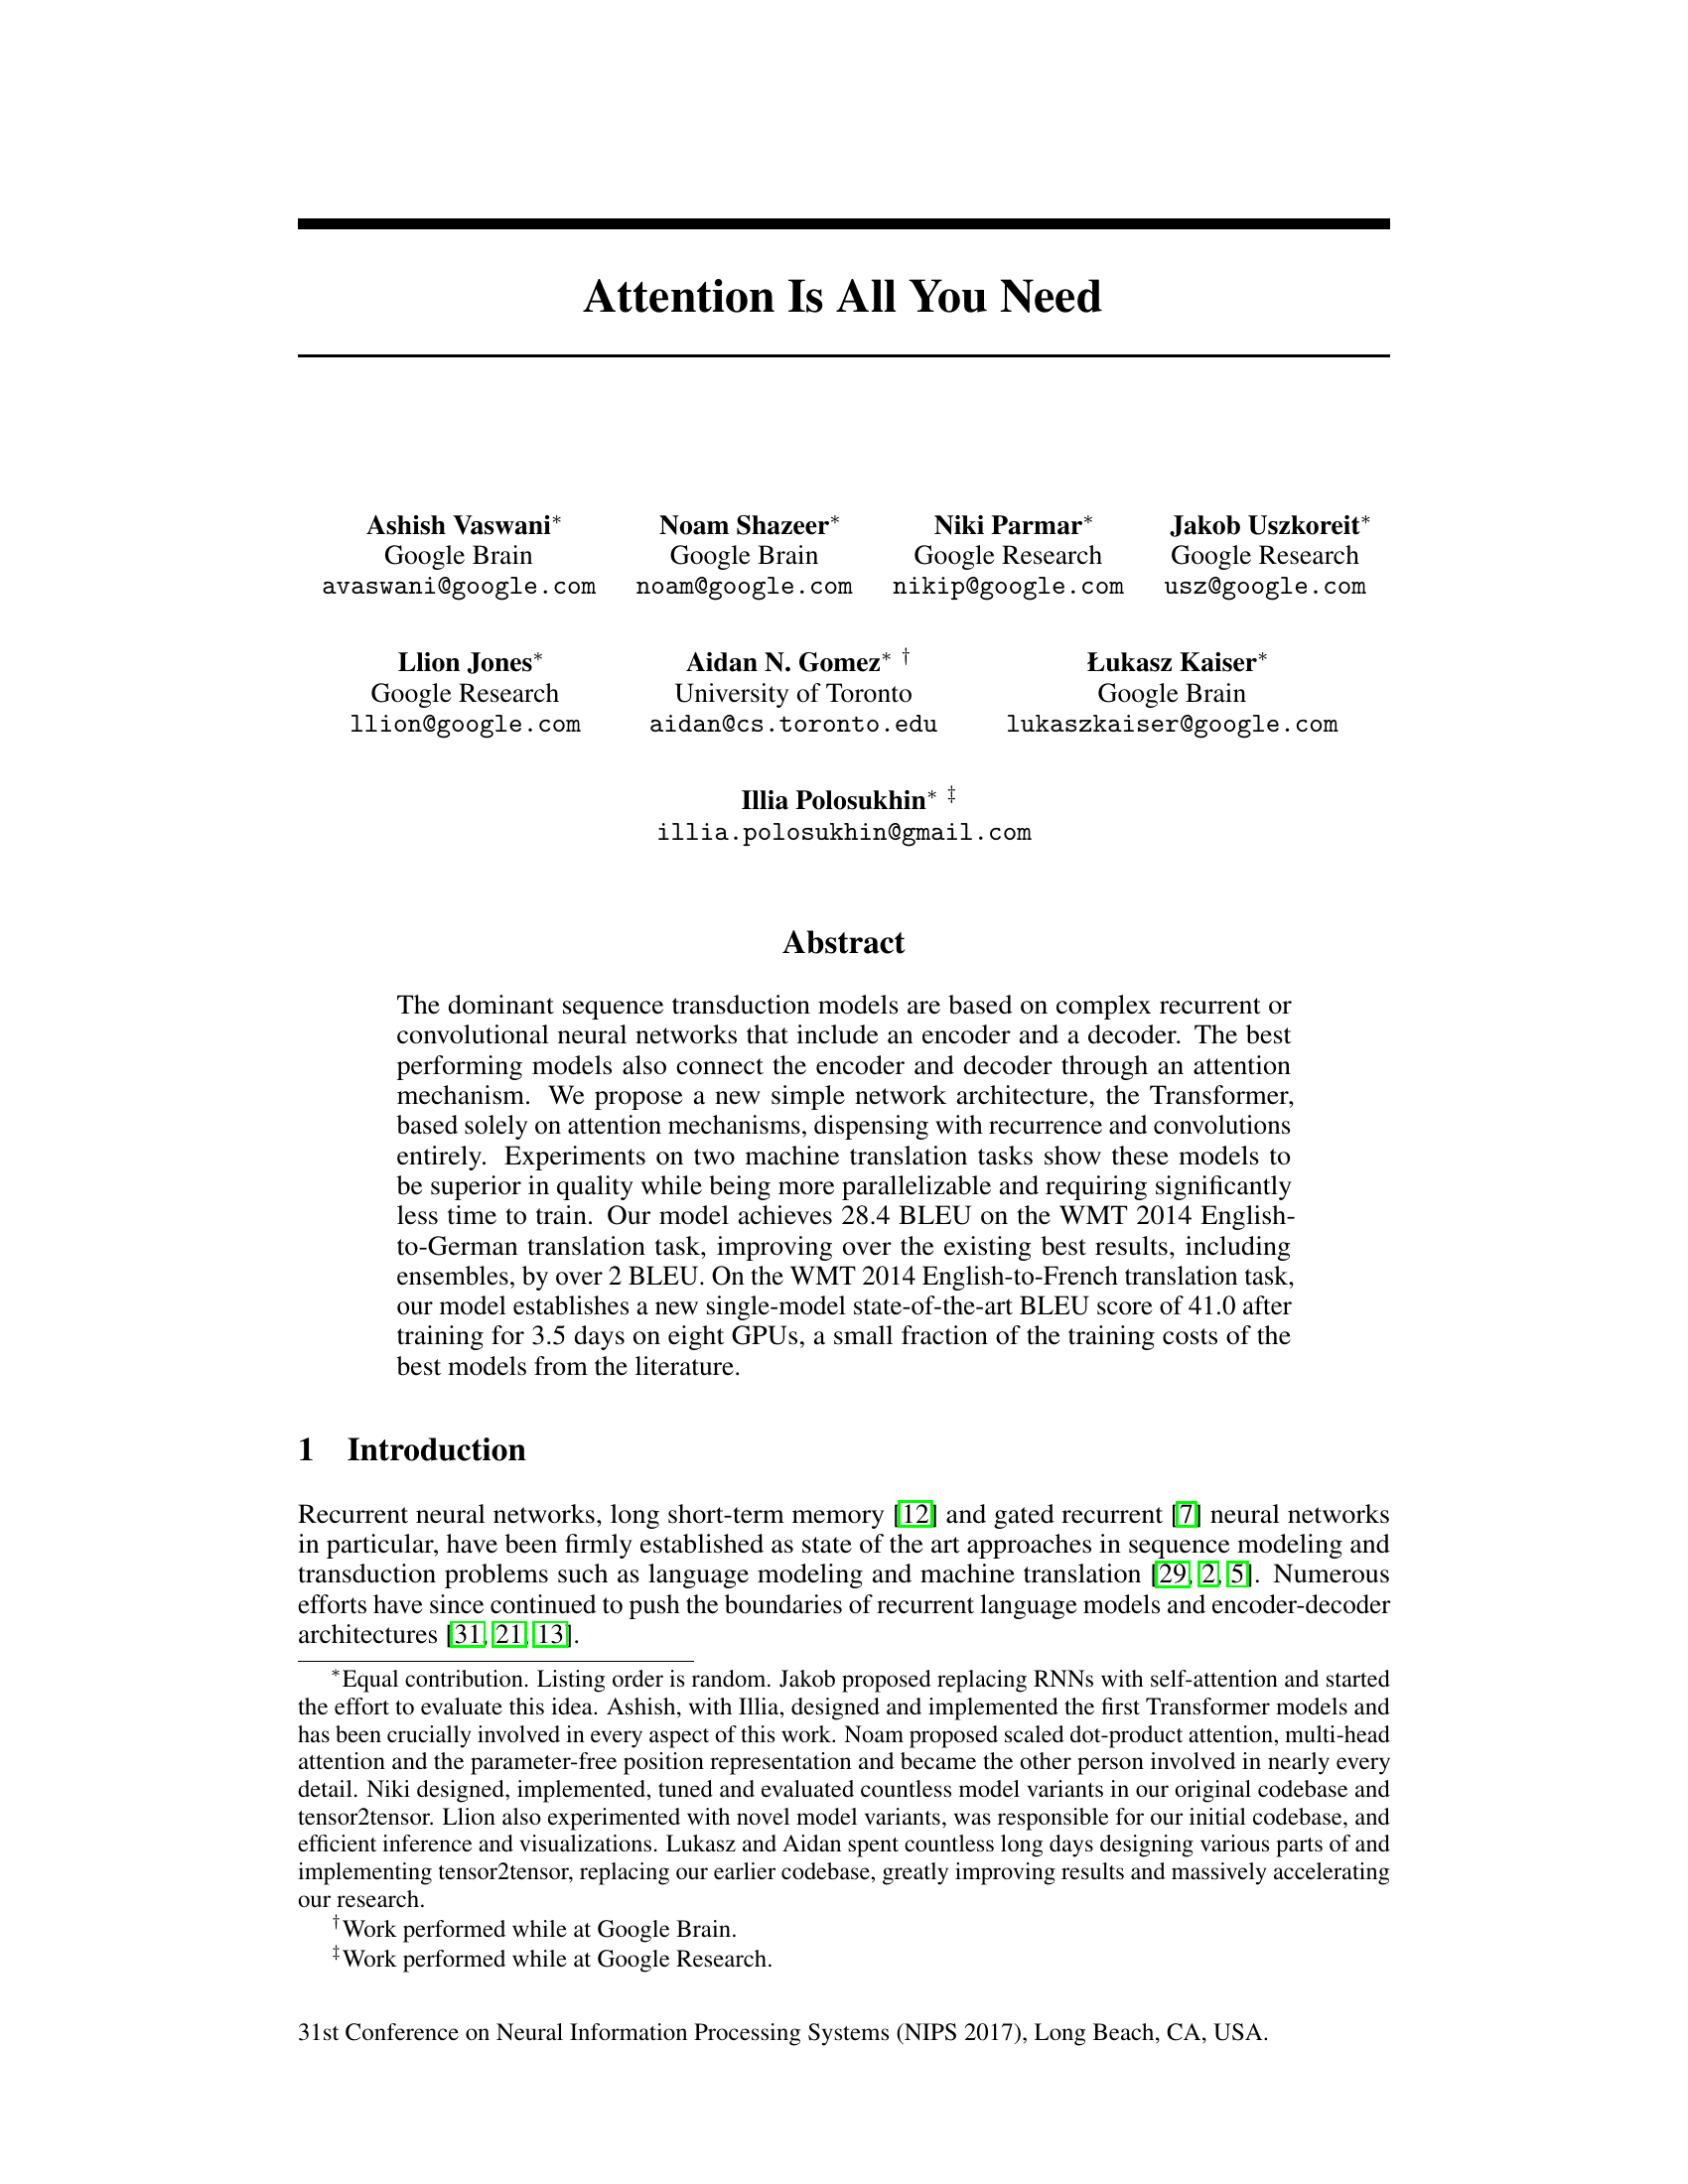

In [4]:
from pdf2image import convert_from_path
from IPython.display import display

page_number = 1


# pdf -> image
images = convert_from_path(test_pdf, first_page=page_number, last_page=page_number)

# save image to a new pdf
new_pdf_name = f"{test_pdf.stem}_{page_number}.pdf"
images[0].save(new_pdf_name, "PDF", resolution=100.0)

# show image
image = images[0]

display(image)

In [5]:
# it may take a while to convert the pdf to markdown
# it depends on the size of the pdf, also your computer's performance
markdown_result = convert_pdf_to_md(new_pdf_name, langs=["en"], extract_images=False)

File converted successfully


In [6]:
md_file = test_pdf.with_suffix(".md")
with open(md_file, "w") as file:
    file.write(markdown_result["message"])